In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')

# Reading the data

In [371]:
bikes=pd.read_csv("day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [372]:
bikes.shape

(730, 16)

In [373]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


#### All variables have non missing values, hence no need to exclude or impute

In [374]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Cleansing of data
- Convert ordinal variables into categorical variables
- Convert season and working day into categorical, converting it to dummy variables after visualisation of data

In [375]:
bikes['season'] = bikes['season'].astype(str)
bikes['weathersit'] = bikes['weathersit'].astype(str)
bikes['mnth'] = bikes['mnth'].astype(str)
bikes['weekday'] = bikes['weekday'].astype(str)
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(7), object(5)
memory usage: 91.3+ KB


- we have converted days of week, month, season and weather conditions to object since other variables like season,hoilday, working day are already binary variables

## Visualise the data

#### Visualising Numeric data
- Visualise data through pair plot

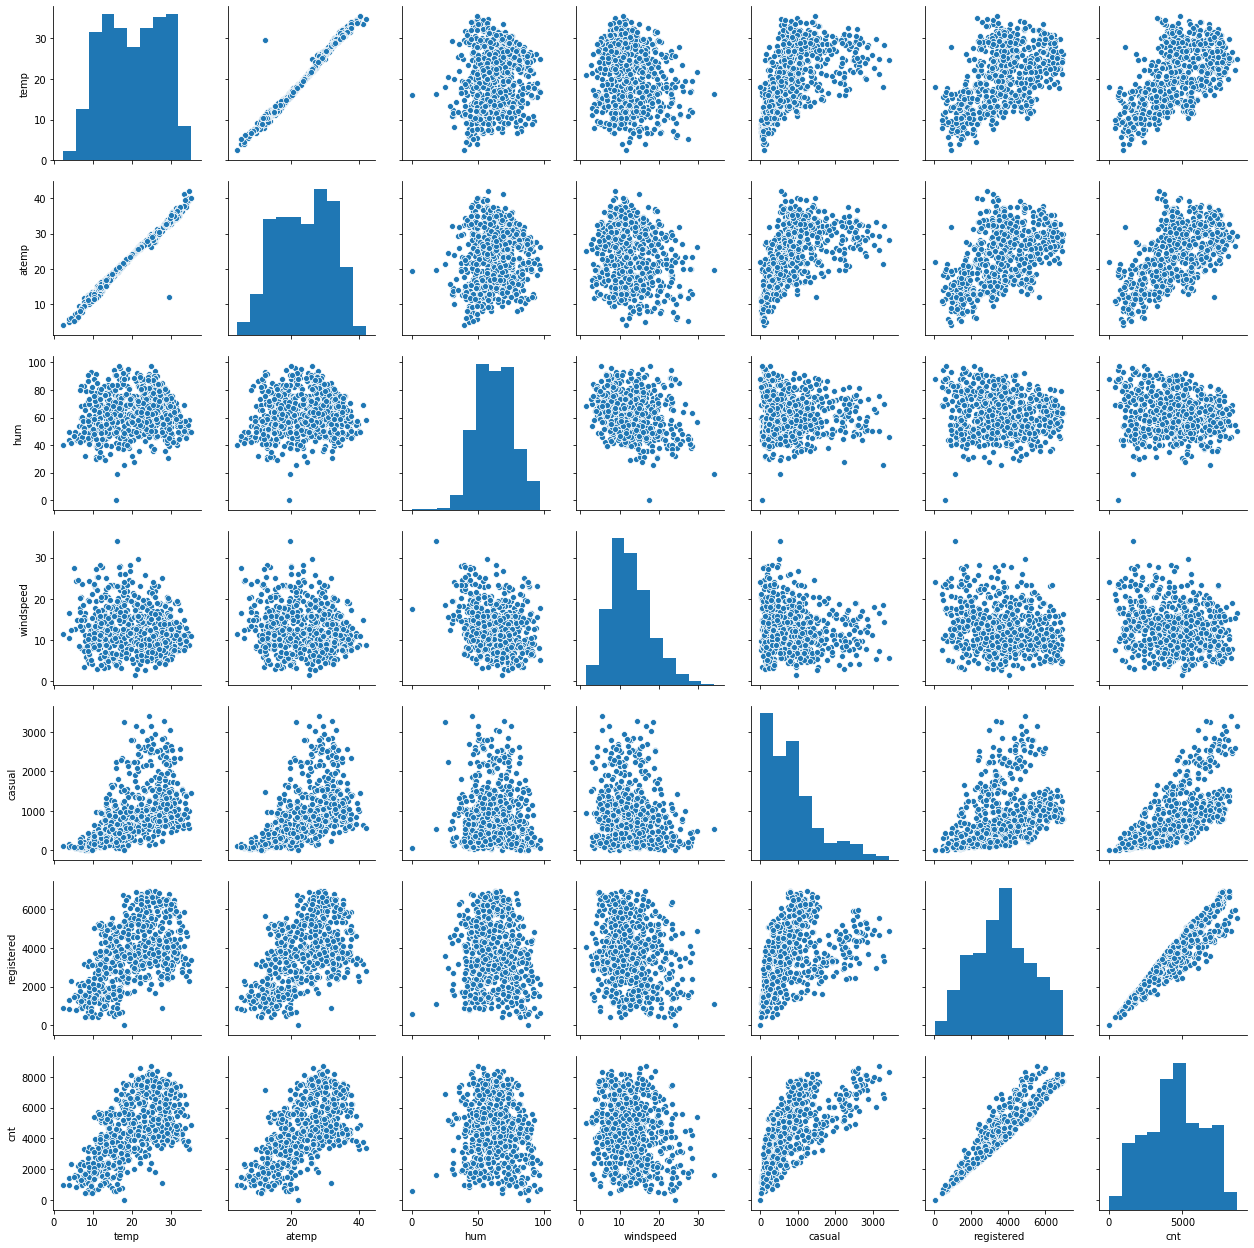

In [376]:
numeric_variables=['temp','atemp','hum','windspeed','casual','registered','cnt']

sns.pairplot(bikes[numeric_variables])
plt.show()

### `Insights`
- we will not consider casual and registered  with cnt since cnt is a combination of these 2 variables hence these varibales show linear relation ship with cnt
- Temp and atemp show linear relationship with cnt
- windspeed also seems to have ceratin relationship with cnt, however the plots are not exactly linear

#### Visualising categorical 
- visulaise variables with boxplot

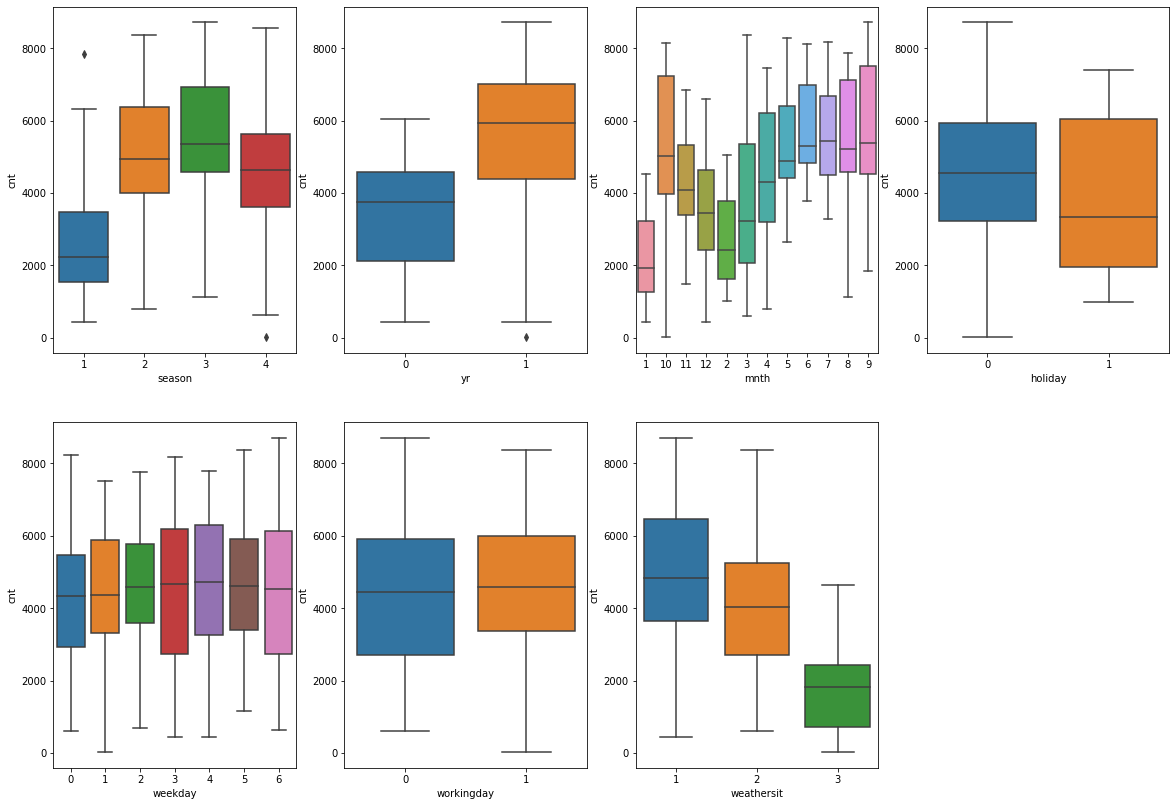

In [377]:
cat_vars=['season','yr','mnth','holiday','weekday','workingday','weathersit']

plt.figure(figsize=(20, 14))
plt.subplot(2,4,1)
sns.boxplot(x = cat_vars[0], y = 'cnt', data = bikes)
plt.subplot(2,4,2)
sns.boxplot(x = cat_vars[1], y = 'cnt', data = bikes)
plt.subplot(2,4,3)
sns.boxplot(x = cat_vars[2], y = 'cnt', data = bikes)
plt.subplot(2,4,4)
sns.boxplot(x = cat_vars[3], y = 'cnt', data = bikes)
plt.subplot(2,4,5)
sns.boxplot(x = cat_vars[4], y = 'cnt', data = bikes)
plt.subplot(2,4,6)
sns.boxplot(x = cat_vars[5], y = 'cnt', data = bikes)
plt.subplot(2,4,7)
sns.boxplot(x = cat_vars[6], y = 'cnt', data = bikes)
plt.show()

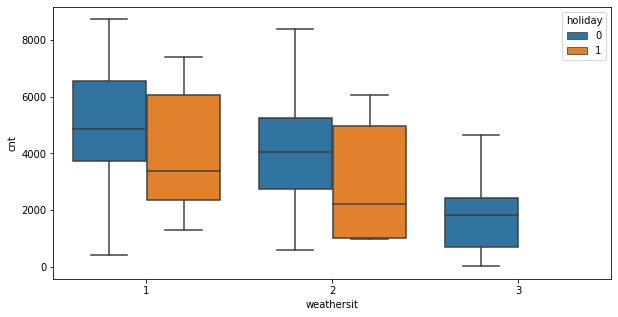

In [378]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'holiday', data = bikes)
plt.show()

### `Insights`

- Demand for bikes is less in spring as compared to other seasons
- 2019 shows increased demand
- The demand for rental bikes show increase from april till october and then gradually decreses november onwards
- Non holiday has higher rental bike counts
- Weekday show no significance in bike rentals, the median remains same across the days of week
- Similarly for working day no difference
- Demands are higher when weather is clear/ partially cloudy

## Data Preperation

- Variables like season, wethersit, month, weekday need to be converted into binary variables using dummy variables
- Workingday, holiday, yr are already binary hence no need to map

In [379]:
# List of variables to create dummy
varlist =  ['season', 'weathersit', 'mnth', 'weekday']

season = pd.get_dummies(bikes[varlist[0]], drop_first = True)
weathersit = pd.get_dummies(bikes[varlist[1]], drop_first = True)
mnth = pd.get_dummies(bikes[varlist[2]], drop_first = True)
weekday = pd.get_dummies(bikes[varlist[3]], drop_first = True)

In [380]:
print(season.head())
season.rename(columns = {'2':'summer', '3':'fall','4': 'winter'}, inplace = True)
season.head()

   2  3  4
0  0  0  0
1  0  0  0
2  0  0  0
3  0  0  0
4  0  0  0


,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [381]:
print(weathersit.head())
weathersit.rename(columns = {'2':'Mist', '3':'Light_snow'}, inplace = True)
weathersit.head()

   2  3
0  1  0
1  1  0
2  0  0
3  0  0
4  0  0


,Mist,Light_snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [382]:
print(mnth.head())
mnth.rename(columns = {'2':'Feb', '3':'Mar','4':'Apr','5':'May','6':'Jun','7':'Jul','8':'Aug','9':'Sep','10':'Oct','11':'Nov','12':'Dec'}, inplace = True)
mnth.head()

   10  11  12  2  3  4  5  6  7  8  9
0   0   0   0  0  0  0  0  0  0  0  0
1   0   0   0  0  0  0  0  0  0  0  0
2   0   0   0  0  0  0  0  0  0  0  0
3   0   0   0  0  0  0  0  0  0  0  0
4   0   0   0  0  0  0  0  0  0  0  0


,Oct,Nov,Dec,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [383]:
print(weekday.head())
weekday.rename(columns = {'1':'Tues','2':'Wed', '3':'Thurs','4':'Fri','5':'Sat','6':'Sun'},inplace=True)
weekday.head()

   1  2  3  4  5  6
0  0  0  0  0  0  1
1  0  0  0  0  0  0
2  1  0  0  0  0  0
3  0  1  0  0  0  0
4  0  0  1  0  0  0


,Tues,Wed,Thurs,Fri,Sat,Sun
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [384]:
# Add the variable results to the original bikes dataframe

bikes = pd.concat([bikes, season,mnth,weathersit,weekday], axis = 1)
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,Aug,Sep,Mist,Light_snow,Tues,Wed,Thurs,Fri,Sat,Sun
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,...,0,0,1,0,0,0,0,0,0,1
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,...,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,...,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,...,0,0,0,0,0,1,0,0,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,...,0,0,0,0,0,0,1,0,0,0


In [385]:
# Drop season,mnth,weathersit,weekday as we have created the dummies for it

bikes.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
bikes.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,Aug,Sep,Mist,Light_snow,Tues,Wed,Thurs,Fri,Sat,Sun
0,1,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,1,0,0,0,0,0,0,1
1,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,1,0,0,0,0
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,1,0,0,0


In [386]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
instant       730 non-null int64
dteday        730 non-null object
yr            730 non-null int64
holiday       730 non-null int64
workingday    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
summer        730 non-null uint8
fall          730 non-null uint8
winter        730 non-null uint8
Oct           730 non-null uint8
Nov           730 non-null uint8
Dec           730 non-null uint8
Feb           730 non-null uint8
Mar           730 non-null uint8
Apr           730 non-null uint8
May           730 non-null uint8
Jun           730 non-null uint8
Jul           730 non-null uint8
Aug           730 non-null uint8
Sep           730 non-null uint8
Mist          730 non-null u

## Splitting data into Train and Test

In [447]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(10)
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling features using Min max scaling

In [448]:
from sklearn.preprocessing import MinMaxScaler

In [449]:
scaler = MinMaxScaler()

In [450]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [451]:
df_train.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,Aug,Sep,Mist,Light_snow,Tues,Wed,Thurs,Fri,Sat,Sun
653,654,16-10-2019,1,0,1,0.509887,0.501133,0.575354,0.300794,922,...,0,0,0,0,0,1,0,0,0,0
576,577,31-07-2019,1,0,1,0.815169,0.766351,0.725633,0.264686,968,...,0,0,0,0,0,1,0,0,0,0
426,427,03-03-2019,1,0,0,0.442393,0.438975,0.640189,0.255342,956,...,0,0,1,0,0,0,0,0,0,1
728,729,30-12-2019,1,0,0,0.245101,0.200348,0.498067,0.663106,364,...,0,0,0,0,0,0,0,0,0,0
482,483,28-04-2019,1,0,0,0.395666,0.391735,0.504508,0.188475,1120,...,0,0,1,0,0,0,0,0,0,1


In [452]:
df_train.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,Aug,Sep,Mist,Light_snow,Tues,Wed,Thurs,Fri,Sat,Sun
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,368.941176,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,837.543137,3648.839216,...,0.096078,0.080392,0.343137,0.029412,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902
std,209.868619,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,675.921998,1580.336986,...,0.294988,0.272166,0.475223,0.169124,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,187.250000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,311.000000,2468.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,373.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,700.000000,3657.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,553.750000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,1076.250000,4841.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,729.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3283.000000,6946.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [453]:
# drop unwanted variables

df_train.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

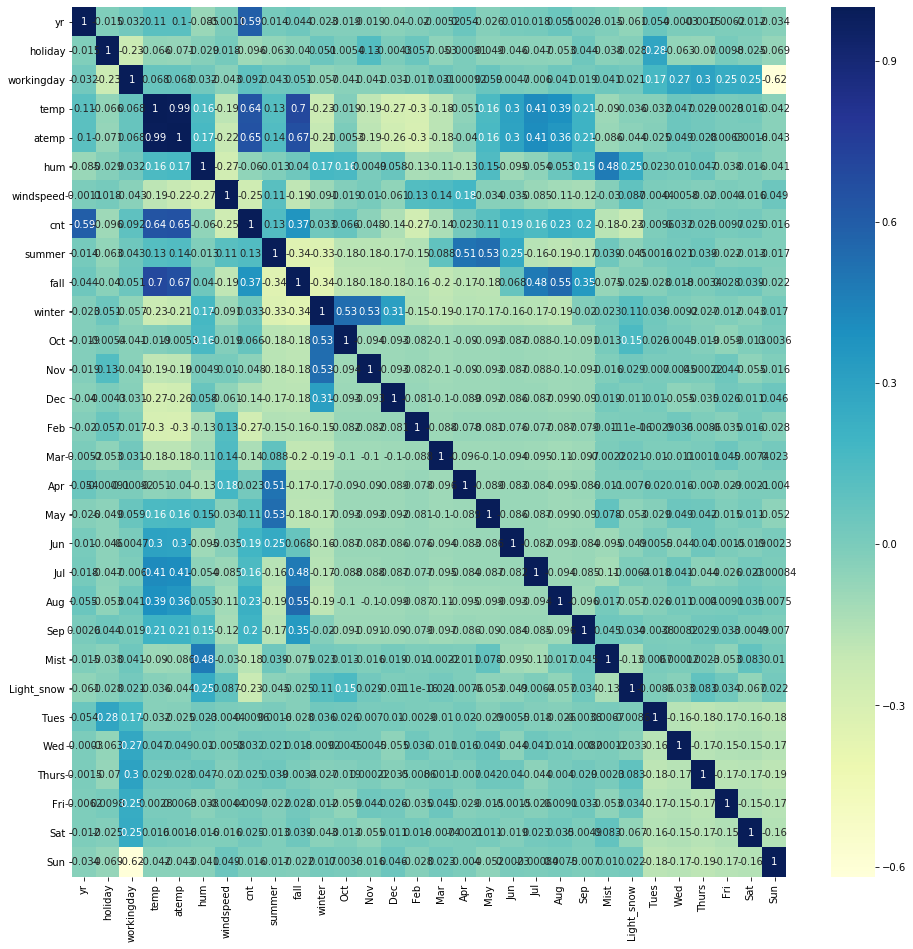

In [454]:
# Check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 16))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- `We can see yr, temp, atemp and fall being highly correlated with cnt` 

#### Divide the data set into X and Y sets

In [455]:
y_train = df_train['cnt']
X_train = df_train.loc[:, df_train.columns != 'cnt']

In [456]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,summer,fall,winter,...,Aug,Sep,Mist,Light_snow,Tues,Wed,Thurs,Fri,Sat,Sun
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,0,0,1,0,0,0,0,0,0,1


## Building a linear regression model

In [457]:
import statsmodels.api as sm

In [458]:
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()


In [459]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          8.42e-181
Time:                        22:37:45   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     481   BIC:                             8376.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1548.4686    264.254      5.860      0.0

- `Friday has the highest p-value, followed by atemp, hence we drop Fri`

In [460]:
X_train.drop(['Fri'],inplace=True,axis=1)

#### VIF

In [461]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [462]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,447.70
4,atemp,383.54
5,hum,20.79
8,fall,15.42
19,Aug,11.01
9,winter,10.93
18,Jul,9.62
2,workingday,9.30
7,summer,8.88
17,Jun,7.35


#### `Dropping temp since it has highest VIF`

In [463]:
X_train.drop(['temp'],axis=1,inplace=True)

In [464]:
# Lets build a second model
X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [466]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          4.12e-180
Time:                        22:38:30   Log-Likelihood:                -4101.9
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     482   BIC:                             8378.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1546.8547    266.154      5.812      0.0

- `Highest p-value is with Thurs hence we drop this variable and check the VIF again`

In [467]:
X_train.drop(['Thurs'],axis=1,inplace=True)
X_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', 'Oct', 'Nov', 'Dec', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Jul', 'Aug', 'Sep', 'Mist', 'Light_snow', 'Tues', 'Wed', 'Sat',
       'Sun'],
      dtype='object')

In [468]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,40.30
4,hum,20.65
7,fall,15.31
8,winter,10.92
18,Aug,10.21
17,Jul,9.05
6,summer,8.87
19,Sep,7.06
15,May,6.82
16,Jun,6.78


#### `Drop atemp variable since it has highest VIF`

In [469]:
X_train.drop(['atemp'],axis=1,inplace=True)
X_train.columns

Index(['yr', 'holiday', 'workingday', 'hum', 'windspeed', 'summer', 'fall',
       'winter', 'Oct', 'Nov', 'Dec', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Mist', 'Light_snow', 'Tues', 'Wed', 'Sat', 'Sun'],
      dtype='object')

In [470]:
# Rebuilding the model- Model 3

X_train_lm = sm.add_constant(X_train)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     90.93
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          3.85e-165
Time:                        22:38:40   Log-Likelihood:                -4143.6
No. Observations:                 510   AIC:                             8339.
Df Residuals:                     484   BIC:                             8449.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1791.3077    286.675      6.249      0.0

#### `Dropping Sat column since it has highest p-value`

In [471]:
X_train.drop(['Sat'],axis=1,inplace=True)
X_train.columns

Index(['yr', 'holiday', 'workingday', 'hum', 'windspeed', 'summer', 'fall',
       'winter', 'Oct', 'Nov', 'Dec', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Mist', 'Light_snow', 'Tues', 'Wed', 'Sun'],
      dtype='object')

In [472]:
## Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.62
6,fall,15.14
7,winter,10.90
5,summer,8.87
17,Aug,7.56
16,Jul,6.17
8,Oct,5.75
9,Nov,5.71
2,workingday,5.70
18,Sep,5.58


#### `dropping hum since it has highest VIF`

In [473]:
X_train.drop('hum',axis=1,inplace=True)
X_train.columns

Index(['yr', 'holiday', 'workingday', 'windspeed', 'summer', 'fall', 'winter',
       'Oct', 'Nov', 'Dec', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Mist', 'Light_snow', 'Tues', 'Wed', 'Sun'],
      dtype='object')

In [474]:
# Rebuilding the model- Model 4

X_train_lm = sm.add_constant(X_train)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     98.84
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          8.68e-167
Time:                        22:39:05   Log-Likelihood:                -4144.5
No. Observations:                 510   AIC:                             8337.
Df Residuals:                     486   BIC:                             8439.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1519.2858    179.827      8.449      0.0

In [475]:
X_train.drop('holiday',axis=1,inplace=True)
X_train.columns

Index(['yr', 'workingday', 'windspeed', 'summer', 'fall', 'winter', 'Oct',
       'Nov', 'Dec', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Mist', 'Light_snow', 'Tues', 'Wed', 'Sun'],
      dtype='object')

In [476]:
## Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,fall,15.14
5,winter,10.84
3,summer,8.86
15,Aug,7.09
14,Jul,5.80
6,Oct,5.25
7,Nov,5.25
16,Sep,5.09
12,May,4.51
1,workingday,4.49


In [477]:
X_train.drop('fall',axis=1,inplace=True)
X_train.columns

Index(['yr', 'workingday', 'windspeed', 'summer', 'winter', 'Oct', 'Nov',
       'Dec', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Mist',
       'Light_snow', 'Tues', 'Wed', 'Sun'],
      dtype='object')

In [478]:
# Rebuilding the model- Model 5

X_train_lm = sm.add_constant(X_train)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     106.9
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          2.40e-167
Time:                        22:39:26   Log-Likelihood:                -4148.0
No. Observations:                 510   AIC:                             8340.
Df Residuals:                     488   BIC:                             8433.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1514.3152    175.939      8.607      0.0

#### `Here Wed has highest p value lets check the vif`

In [479]:
X_train.drop('Wed',axis=1,inplace=True)
X_train.columns

Index(['yr', 'workingday', 'windspeed', 'summer', 'winter', 'Oct', 'Nov',
       'Dec', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Mist',
       'Light_snow', 'Tues', 'Sun'],
      dtype='object')

In [480]:
# Recheck VIF

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,winter,8.01
3,summer,6.18
5,Oct,4.26
6,Nov,4.25
2,windspeed,4.24
1,workingday,4.17
11,May,3.57
10,Apr,3.55
7,Dec,2.75
12,Jun,2.14


#### `Dropping winter since vif>5`

In [481]:
X_train.drop('winter',axis=1,inplace=True)
X_train.columns

Index(['yr', 'workingday', 'windspeed', 'summer', 'Oct', 'Nov', 'Dec', 'Feb',
       'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Mist', 'Light_snow',
       'Tues', 'Sun'],
      dtype='object')

In [482]:
# Rebuilding the model- Model 6

X_train_lm = sm.add_constant(X_train)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     110.5
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          2.51e-163
Time:                        22:39:59   Log-Likelihood:                -4162.8
No. Observations:                 510   AIC:                             8366.
Df Residuals:                     490   BIC:                             8450.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1527.2869    180.702      8.452      0.0

#### `Dropping Tues variable with highest p value`

In [483]:
X_train.drop('Tues',axis=1,inplace=True)
X_train.columns

Index(['yr', 'workingday', 'windspeed', 'summer', 'Oct', 'Nov', 'Dec', 'Feb',
       'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Mist', 'Light_snow',
       'Sun'],
      dtype='object')

In [484]:
# Recheck VIF

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,summer,6.18
2,windspeed,4.18
1,workingday,4.09
10,May,3.57
9,Apr,3.55
11,Jun,2.14
8,Mar,2.00
0,yr,1.97
17,Sun,1.72
15,Mist,1.56


#### `Dropping summer and checking the model`

In [485]:
X_train.drop('summer',axis=1,inplace=True)

In [486]:
# Rebuilding the model- Model 7

X_train_lm = sm.add_constant(X_train)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     122.0
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          4.94e-164
Time:                        22:40:20   Log-Likelihood:                -4166.1
No. Observations:                 510   AIC:                             8368.
Df Residuals:                     492   BIC:                             8444.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1500.7036    180.967      8.293      0.0

- `Dropping Feb`

In [487]:
X_train.drop('Feb',axis=1,inplace=True)
X_train.columns

Index(['yr', 'workingday', 'windspeed', 'Oct', 'Nov', 'Dec', 'Mar', 'Apr',
       'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Mist', 'Light_snow', 'Sun'],
      dtype='object')

In [488]:
# Lets check VIF to proceed with this model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,3.88
2,windspeed,3.63
0,yr,1.95
15,Sun,1.69
13,Mist,1.55
6,Mar,1.48
7,Apr,1.41
11,Aug,1.40
8,May,1.34
3,Oct,1.33


- `All VIFs are less than 5, hence multicollinearity does not exists`

In [489]:
# Rebuilding the model- Model 8

X_train_lm = sm.add_constant(X_train)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     127.1
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          3.33e-163
Time:                        22:40:50   Log-Likelihood:                -4170.6
No. Observations:                 510   AIC:                             8375.
Df Residuals:                     493   BIC:                             8447.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1742.5286    162.932     10.695      0.0

- `All variables has p-vale <0.025 i.e @ 5% alpha, we also observe F statistics to be zero,hence the model is significant`

- Here the R square and R square adjusted are 81% and 80% respectively
- FStatistics is 0, hence model is significant
- All variables p-value are lower, i.e. all variables are significant
- Lets check VIF for these variables, if VIF value<5 then we can use the above model for further analysis

- All variables have VIF<5 hence we can use model 8

In [490]:
X_train.head()

,yr,workingday,windspeed,Oct,Nov,Dec,Mar,Apr,May,Jun,Jul,Aug,Sep,Mist,Light_snow,Sun
653,1,1,0.300794,1,0,0,0,0,0,0,0,0,0,0,0,0
576,1,1,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0.255342,0,0,0,1,0,0,0,0,0,0,1,0,1
728,1,0,0.663106,0,0,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0.188475,0,0,0,0,1,0,0,0,0,0,1,0,1


## Residual Analysis of the train data

In [491]:
y_train_cnt = lr_8.predict(X_train_lm)

Text(0.5, 0, 'Errors')

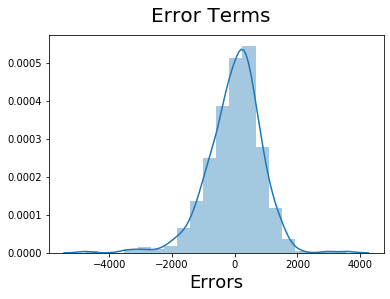

In [492]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [534]:
residuals = y_train-y_train_cnt
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(round(mean_residuals,2)))

Mean of Residuals 0.0


- `Here the residuals follow normal distribution with mean 0, which means our model is good`

### Checking heteroscedasticicty of residuals

Text(0, 0.5, 'Residuals')

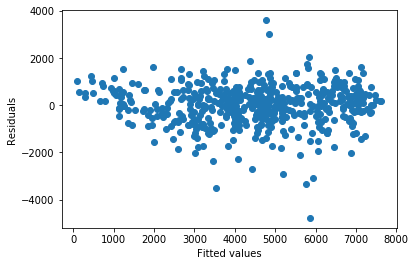

In [526]:
plt.scatter(y_train_cnt, (y_train-y_train_cnt))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

#### The plot shows the residulas are randomly disributed, hence no heteroscedasticy in the model

## Making Predictions Using the Final Model

In [493]:
## Applying the scaling on the test set

num_vars = ['temp', 'atemp', 'hum', 'windspeed']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [494]:
df_test.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,Aug,Sep,Mist,Light_snow,Tues,Wed,Thurs,Fri,Sat,Sun
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,356.776256,0.479452,0.036530,0.698630,0.546312,0.530942,0.508750,0.418870,875.968037,3671.013699,...,0.059361,0.086758,0.319635,0.027397,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721
std,213.665198,0.500722,0.188034,0.459904,0.249189,0.228159,0.201253,0.188111,712.783588,1509.322560,...,0.236840,0.282125,0.467403,0.163612,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,432.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,171.000000,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,336.500000,2507.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,349.000000,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,736.000000,3667.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,537.500000,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,1190.000000,4624.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,730.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3410.000000,6844.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [505]:
X_train_lm.columns

Index(['const', 'yr', 'workingday', 'windspeed', 'Oct', 'Nov', 'Dec', 'Mar',
       'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Mist', 'Light_snow', 'Sun'],
      dtype='object')

In [496]:
y_test = df_test.pop('cnt')
X_test = df_test

In [497]:
X_test.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [498]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,summer,fall,winter,...,Aug,Sep,Mist,Light_snow,Tues,Wed,Thurs,Fri,Sat,Sun
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0,1,0,...,0,0,1,0,1,0,0,0,0,0
535,1,0,1,0.911423,0.855132,0.470417,0.231142,1,0,0,...,0,0,0,0,0,0,1,0,0,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0,0,1,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0,1,0,...,1,0,0,0,0,0,1,0,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [506]:
X_test=X_test[['yr', 'workingday', 'windspeed', 'Oct', 'Nov', 'Dec', 'Mar',
       'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Mist', 'Light_snow', 'Sun']]

In [507]:
# Adding constant variable to test dataframe
X_test_m8 = sm.add_constant(X_test)

In [508]:
# Making predictions using the 8th model

y_pred_m8 = lr_8.predict(X_test_m8)

## Model Evaluation

Text(0, 0.5, 'Actuals')

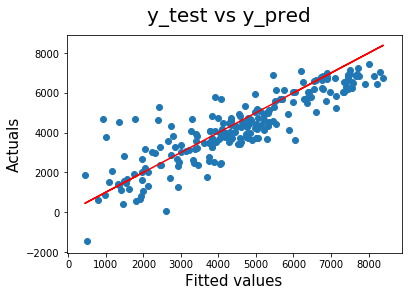

In [522]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.plot(y_test,y_test, color="red")
plt.scatter(y_test, y_pred_m8)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading     
plt.xlabel("Fitted values",fontsize = 15)
plt.ylabel("Actuals",fontsize = 15)

#### Checking heteroscedasticity

Text(0, 0.5, 'Residuals')

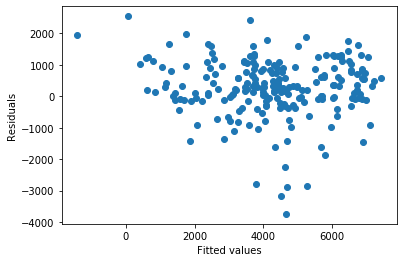

In [527]:
plt.scatter(y_pred_m8, (y_test-y_pred_m8))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

## No heteroscedasticity observed

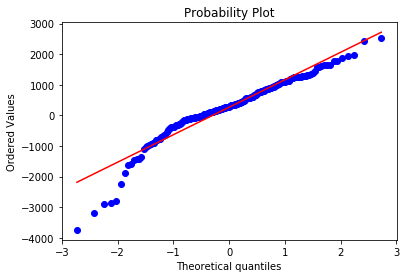

In [528]:
import scipy.stats as stats
stats.probplot(y_test-y_pred_m8, plot=plt)
plt.show()

### Evaluation

#### R2 on test dataset

In [529]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m8)

0.7433794809000009

#### R2 on train dataset

In [511]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_cnt)

0.804823700160181

### Conclusions
- The Model has R square of 80% on train set and R square of 74.33% test set
- There is scope of improvement in data
- Alternative method is to use RFE on variables
- This method is manual variable selection
- Overall we have a decent model, but we also acknowledge that we could do better.

In [514]:
lr_8.params

const         1742.528597
yr            2153.832989
workingday     497.834118
windspeed    -1586.389845
Oct           2797.698675
Nov           1903.116641
Dec           1235.189670
Mar           1378.811762
Apr           2172.884492
May           2861.892216
Jun           3087.635962
Jul           2847.767486
Aug           3065.055498
Sep           3370.419837
Mist          -747.598784
Light_snow   -2580.573758
Sun            546.759488
dtype: float64

#### We can see that the equation of our best fitted line is:

cnt=1742.528597 + 2153.83 x yr + workingday x 497.834118 + windspeed x (-1586.389845) + Oct x 2797.698675 + Nov x 1903.116641 + Dec x 1235.189 + Mar x 1378.811762 + Apr x 2172.884492 + May x 2861.892216 + Jun x 3087.635962 + Jul x 2847.767486 + Aug x 3065.055498 + Sep x 3370.419837 + Mist x (-747.598784) + Light_snow x (-2580.573758) + Sun x 546.759488